In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Define parameters of the default pumping function / pump chart
x = np.array([7.,6.,5.,4.,3.5,3.,2,1,0,5.,4.,3.5,3.,2]) * 1000 # water gradient [mm] (by factor 1000 from m)
y = np.array([0,4.2,8.4,12.6,14.5,15.8,17.5,19,20.5,8.4,12.6,14.5,15.8,17.5]) * 3600 / (35000 * 100 * 100) * 1000 * 4  # "*3600 / (35000 * 100 * 100) * 1000 * 4)" converts m^3/s in mm/h
pump_bau = np.polynomial.polynomial.Polynomial.fit(x = x, y = y, deg = 2)

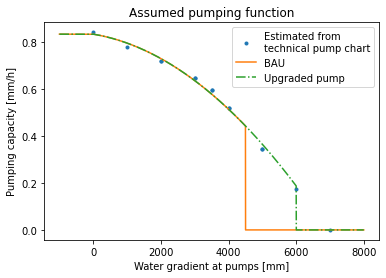

In [6]:
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0.0, marker = '.', label = "Estimated from\ntechnical pump chart")

x_plot = np.arange(-1000,8000)

bau_plot = pump_bau(x_plot)
bau_plot[x_plot<=0] = pump_bau(0) 
bau_plot[x_plot>4500] = 0 

large_plot = pump_bau(x_plot)
large_plot[x_plot<=0] = pump_bau(0) 
large_plot[x_plot>6000] = 0 

ax.plot(x_plot, bau_plot, label = "BAU")
ax.plot(x_plot, large_plot, "-.", label = "Upgraded pump")

ax.set_xlabel("Water gradient at pumps [mm]")
ax.set_ylabel("Pumping capacity [mm/h]")
ax.set_title("Assumed pumping function")
ax.legend()

plt.show()